## The Museum of Modern Art (MoMA) Collection
### MoMa updates a dataet every year containing all of their artwork and the artists behind them. The collection contains almost 200,000 works from around the world spanning the last 150 years. The collection includes an ever-expanding range of visual expression, including painting, sculpture, printmaking, drawing, photography, architecture, design, film, and media and performance art. I'm not quite sure what I want to investigate in this dataset but one cool thing would be to look at how gender and race is represented at the museum over time. 

### We will look at 2 datasets: Artworks.csv which contains every artwork in MoMA's collection, and 

In [271]:
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None  # default='warn'
import util
pd.options.mode.chained_assignment = None  # default='warn'
%matplotlib inline

In [272]:
df2 = pd.read_csv(os.path.join("Artworks.csv") , names=[
        'title', 
        'artist_name', 
        'constituent_id', 
        'artist_bio', 
        'nationality', 
        'begin_date', 
        'end_date', 
        'gender', 
        'date', 
        'medium', 
        'dimensions', 
        'credit_line', 
        'accession_number', 
        'classification', 
        'department', 
        'date_acquired', 
        'cataloged', 
        'object_id', 
        'url', 
        'thumbnail_url', 
        'circumference_cm', 
        'depth_cm', 
        'diameter_cm', 
        'height_cm', 
        'length_cm', 
        'weight_kg', 
        'width_cm', 
        'seat_height_cm', 
        'durcation_seconds']).drop(0, axis=0)



df2


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (17,20,21,22,23,24,25,26,27,28) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,title,artist_name,constituent_id,artist_bio,nationality,begin_date,end_date,gender,date,medium,...,thumbnail_url,circumference_cm,depth_cm,diameter_cm,height_cm,length_cm,weight_kg,width_cm,seat_height_cm,durcation_seconds
1,"Ferdinandsbrücke Project, Vienna, Austria (Ele...",Otto Wagner,6210,"(Austrian, 1841–1918)",(Austrian),(1841),(1918),(Male),1896,Ink and cut-and-pasted painted pages on paper,...,http://www.moma.org/media/W1siZiIsIjU5NDA1Il0s...,NaN,NaN,NaN,48.6,NaN,NaN,168.9,NaN,NaN
2,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,7470,"(French, born 1944)",(French),(1944),(0),(Male),1987,Paint and colored pencil on print,...,http://www.moma.org/media/W1siZiIsIjk3Il0sWyJw...,NaN,NaN,NaN,40.6401,NaN,NaN,29.8451,NaN,NaN
3,"Villa near Vienna Project, Outside Vienna, Aus...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(Male),1903,"Graphite, pen, color pencil, ink, and gouache ...",...,http://www.moma.org/media/W1siZiIsIjk4Il0sWyJw...,NaN,NaN,NaN,34.3,NaN,NaN,31.8,NaN,NaN
4,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(),(1944),(0),(Male),1980,Photographic reproduction with colored synthet...,...,http://www.moma.org/media/W1siZiIsIjEyNCJdLFsi...,NaN,NaN,NaN,50.8,NaN,NaN,50.8,NaN,NaN
5,"Villa, project, outside Vienna, Austria, Exter...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(Male),1903,"Graphite, color pencil, ink, and gouache on tr...",...,http://www.moma.org/media/W1siZiIsIjEyNiJdLFsi...,NaN,NaN,NaN,38.4,NaN,NaN,19.1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138147,Untitled,"Chesnutt Brothers Studio, Andrew Chesnutt, Lew...","133005, 133006, 133007","(American, 1861–1934) (American, 1860–1933)",() (American) (American),(0) (1861) (1860),(0) (1934) (1933),() (Male) (Male),c. 1890,Gelatin silver print,...,http://www.moma.org/media/W1siZiIsIjQ5MjcyMiJd...,NaN,NaN,NaN,10.795022,NaN,NaN,16.510033,NaN,NaN
138148,Plate (folio 2 verso) from Muscheln und schirm...,Sophie Taeuber-Arp,5777,"(Swiss, 1889–1943)",(Swiss),(1889),(1943),(Female),1939,One from an illustrated book with four line bl...,...,http://www.moma.org/media/W1siZiIsIjQ4NTExNSJd...,NaN,NaN,NaN,13.5,NaN,NaN,10.0,NaN,NaN
138149,Plate (folio 6) from Muscheln und schirme (She...,Sophie Taeuber-Arp,5777,"(Swiss, 1889–1943)",(Swiss),(1889),(1943),(Female),1939,One from an illustrated book with four line bl...,...,http://www.moma.org/media/W1siZiIsIjQ4NTExOCJd...,NaN,NaN,NaN,13.5,NaN,NaN,10.0,NaN,NaN
138150,Plate (folio 12) from Muscheln und schirme (Sh...,Sophie Taeuber-Arp,5777,"(Swiss, 1889–1943)",(Swiss),(1889),(1943),(Female),1939,One from an illustrated book with four line bl...,...,http://www.moma.org/media/W1siZiIsIjQ4NTEyMCJd...,NaN,NaN,NaN,11.0,NaN,NaN,10.0,NaN,NaN


In [273]:
#clean columns and convert to numeric for dates 

df2['gender'] = df2['gender'].replace('(', '')
df2['gender'] = df2['gender'].replace(')', '')

df2['nationality'] = df2['nationality'].replace(')', '')
df2['nationality'] = df2['nationality'].replace(')', '')

df2['end_date'] = df2['end_date'].replace(')', '')
df2['end_date'] = df2['end_date'].replace(')', '')


#replace empty strings with NaNs
df2 = df2.replace('', np.nan, regex=True)

# show data
display(df2.head())
print(df2.shape)

,title,artist_name,constituent_id,artist_bio,nationality,begin_date,end_date,gender,date,medium,...,thumbnail_url,circumference_cm,depth_cm,diameter_cm,height_cm,length_cm,weight_kg,width_cm,seat_height_cm,durcation_seconds
1,"Ferdinandsbrücke Project, Vienna, Austria (Ele...",Otto Wagner,6210,"(Austrian, 1841–1918)",(Austrian),(1841),(1918),(Male),1896,Ink and cut-and-pasted painted pages on paper,...,http://www.moma.org/media/W1siZiIsIjU5NDA1Il0s...,NaN,NaN,NaN,48.6,NaN,NaN,168.9,NaN,NaN
2,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,7470,"(French, born 1944)",(French),(1944),(0),(Male),1987,Paint and colored pencil on print,...,http://www.moma.org/media/W1siZiIsIjk3Il0sWyJw...,NaN,NaN,NaN,40.6401,NaN,NaN,29.8451,NaN,NaN
3,"Villa near Vienna Project, Outside Vienna, Aus...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(Male),1903,"Graphite, pen, color pencil, ink, and gouache ...",...,http://www.moma.org/media/W1siZiIsIjk4Il0sWyJw...,NaN,NaN,NaN,34.3,NaN,NaN,31.8,NaN,NaN
4,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(),(1944),(0),(Male),1980,Photographic reproduction with colored synthet...,...,http://www.moma.org/media/W1siZiIsIjEyNCJdLFsi...,NaN,NaN,NaN,50.8,NaN,NaN,50.8,NaN,NaN
5,"Villa, project, outside Vienna, Austria, Exter...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(Male),1903,"Graphite, color pencil, ink, and gouache on tr...",...,http://www.moma.org/media/W1siZiIsIjEyNiJdLFsi...,NaN,NaN,NaN,38.4,NaN,NaN,19.1,NaN,NaN


(138151, 29)


In [206]:
# Toggle this value to show or hide NaN values
PLOT_NAN_VALUES = True
df2

,constituent_id,artist_name,nationality,gender
0,6210,otto wagner,austrian,male
1,7470,christian de portzamparc,french,male
2,7605,emil hoppe,austrian,male
3,7056,bernard tschumi,NaN,male
30,2964,louis i. kahn,american,male
...,...,...,...,...
150173,132939,alejandro kuropatwa,argentine,NaN
150200,132954,ouattara watts,american,NaN
150202,132956,matthew wong,NaN,NaN
150243,133006,andrew chesnutt,american,male


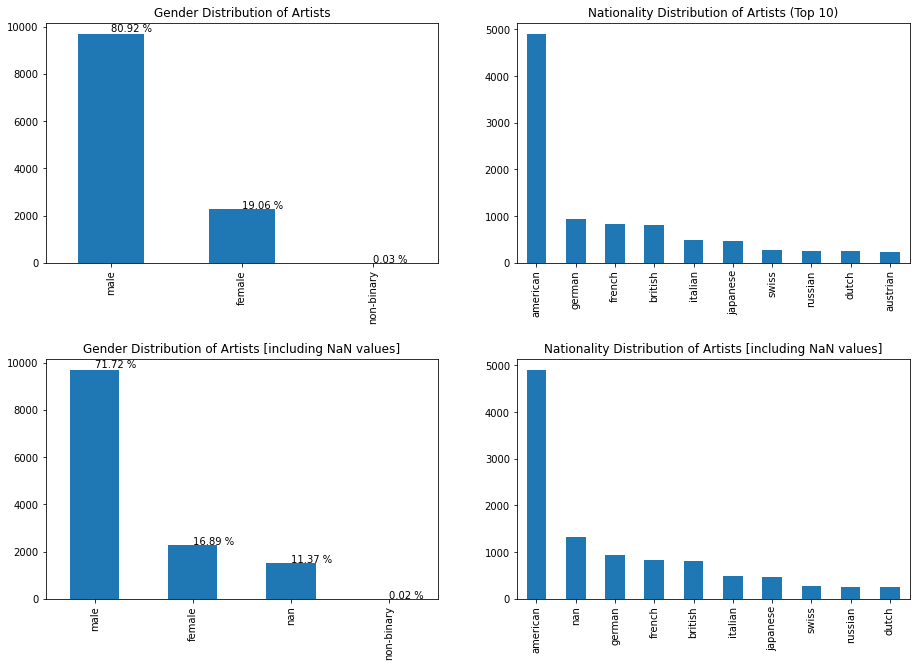

In [208]:
fig = plt.figure(figsize=(12, 8))
plt.subplots_adjust(left=-0.5, bottom=-0.5, right=0.5, top=0.5, wspace=0.2, hspace=0.4)
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

util.plot_distribution(
    dist_df=df2['gender'].value_counts(dropna=True), 
    title="Gender Distribution of Artists",
    ax=ax1)

util.plot_distribution(
    dist_df=df2[df2['nationality'] != 'nationality']['nationality'].value_counts(dropna=True).iloc[0:10,],
    title="Nationality Distribution of Artists (Top 10)",
    ax=ax2, show_pct=False)

if PLOT_NAN_VALUES:
    ax3 = fig.add_subplot(223)
    ax4 = fig.add_subplot(224)
    
    util.plot_distribution(
        dist_df=df2['gender'].value_counts(dropna=False), 
        title="Gender Distribution of Artists [including NaN values]",
        ax=ax3)

    util.plot_distribution(
        dist_df=df2[df2['nationality'] != 'nationality']['nationality'].value_counts(dropna=False).iloc[0:10,],
        title="Nationality Distribution of Artists [including NaN values]",
        ax=ax4, show_pct=False)

In [141]:
#what does gender representation look like for the top five mediums? 

#female = 579
#male = 4115
Gelatin_silver_print = df2[df2['medium'] == "Gelatin silver print"]
Gelatin_silver_print.groupby("gender").count() 


#female = 173
#male = 1297
Lithograph  = df2[df2['medium'] == "Lithograph"]
Lithograph .groupby("gender").count() 

#female = 327
#male = 1100
Chromogenic_color_print = df2[df2['medium'] == "Chromogenic color print"]
Chromogenic_color_print.groupby("gender").count()

#female = 246
#male = 495
#Non-Binary = 2
video = df2[df2['medium'] == "Video (color, sound)"]
video.groupby("gender").count()

#female = 169
#male = 424
ink = df2[df2['medium'] == "Ink on paper"]
ink.groupby("gender").count()

,title,artist_name,constituent_id,artist_bio,nationality,begin_date,end_date,date,medium,dimensions,...,thumbnail_url,circumference_cm,depth_cm,diameter_cm,height_cm,length_cm,weight_kg,width_cm,seat_height_cm,durcation_seconds
gender,,,,,,,,,,,,,,,,,,,,,
,4,4,4,4,4,4,4,4,4,4,...,1,0,0,0,4,0,0,4,0,0
Female,169,169,169,169,169,169,169,169,169,168,...,157,0,9,0,105,0,0,105,0,0
Male,424,424,424,420,424,424,424,424,424,410,...,266,0,22,0,411,0,0,411,0,0


In [164]:
#which artist is the most repoersented? 

artists = df2.groupby("artist_name").count()
artists.sort_values(by=['constituent_id'], ascending=False)
 


,title,constituent_id,artist_bio,nationality,begin_date,end_date,gender,date,medium,dimensions,...,thumbnail_url,circumference_cm,depth_cm,diameter_cm,height_cm,length_cm,weight_kg,width_cm,seat_height_cm,durcation_seconds
artist_name,,,,,,,,,,,,,,,,,,,,,
Unknown photographer,2734,2734,0,2734,2734,2734,2734,2713,2724,2676,...,1862,0,10,15,2302,0,0,2300,0,0
Lee Friedlander,1320,1320,1320,1320,1320,1320,1320,1320,1320,1318,...,303,0,12,0,1318,0,0,1318,0,0
Unknown Artist,671,671,671,671,671,671,671,668,546,386,...,183,0,16,0,380,12,0,382,0,0
Ben Kinmont,665,665,665,665,665,665,665,538,652,157,...,11,0,36,0,90,0,0,90,0,0
Unknown Designer,435,435,435,435,435,435,435,434,417,415,...,297,0,26,55,397,17,0,353,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Jinkichi Koga,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,1,0,0,1,0,0
Jima,1,1,1,1,1,1,1,1,1,1,...,0,0,0,1,0,0,0,0,0,0
Jim Ward,1,1,1,1,1,1,1,1,1,1,...,0,0,1,0,1,0,0,1,0,0
